In [6]:
# TP1 Dimitris Proios
## Requirements install 
## Exercise 1 -- Noise and Metrics

### 1.a) Write a function that determines the Mean Squared Error (MSE) between two images x and y.

In MSE, the lower the error, the more "similar" the two images are
The two images must have the same dimension.

- MSE definition 

$ MSE = \frac{1}{N M} \sum{ _{i=1} ^{N}  \sum{ _{i=1} ^{M} (x[i,j] - y[i,j]) ^2}}$ 



SyntaxError: invalid syntax (<ipython-input-6-3a4ac7f2d295>, line 7)

Load 2 images to test functionality

1. b The mse is 17842.766630867263
which I believe is correct since the mse is not immune to different range.
### Notes 
- For numpy reference of types I used this documentation https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html
- For the replaccement of im2doublle function I used https://docs.scipy.org/doc/numpy/reference/generated/numpy.interp.html 



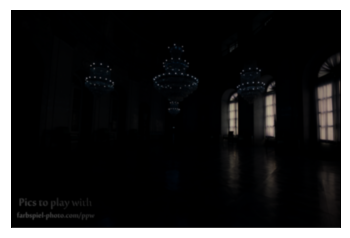

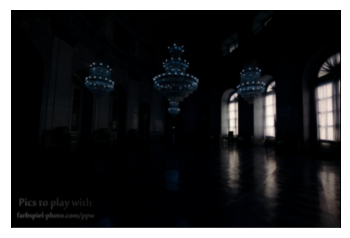

17842.766630867263


In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def readTifGrayScale(path):
    img = cv2.imread(path, -1)
    return img

def showTifGrayScale(img, title = ""):
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.title(title)
    plt.show()

def mse(imageA, imageB) -> float:
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err

imA = Image.open('./data/hdr_images/img01.tif')
img1 = readTifGrayScale('./data/hdr_images/img01.tif')
img2 = readTifGrayScale('./data/hdr_images/img02.tif')
showTifGrayScale(img1)
showTifGrayScale(img2)

# 1.b)  Read in a new copy of the image cameraman.tif, keep it in its original datatype and range, i.e. uint8 and {0..255}.
imgCam = readTifGrayScale('./data/cameraman.tif')
# 1.c)  Now read in a second copy of the image cameraman.tif but map it to double and {0..1}. See Matlab im2double. Compare the two images using the MSE. Can you explain the result?

imgCam_double = np.array(imgCam).astype(np.float32)
imgCam_double = np.interp(
    imgCam_double, 
    (imgCam_double.min(), imgCam_double.max()), 
    (0, 1)
)
print(mse(imgCam_double, imgCam ))
